### Investigation of Statistics behind Character Generation

When I first started playing d&d I became very curious about whether I should accept the pre-generated numbers or if I should roll my own numbers at the table. It struck me that the highest pre-gen number (15) seemed a little low, especially given the protocol of rolling four d6 and taking the highest three. So, I investigated further. 

In [2]:
from New_character import new_character

X = new_character(dice=4, sides=6, dropmin=True).MCsets()

In [13]:
new_character(dice=4, sides=6, dropmin=True).fullset()

strength is 16
constitution is 12
dexterity is 11
wisdom is 10
intelligence is 8
charisma is 8


<New_character.new_character instance at 0x1197ca248>

In [4]:
%matplotlib inline

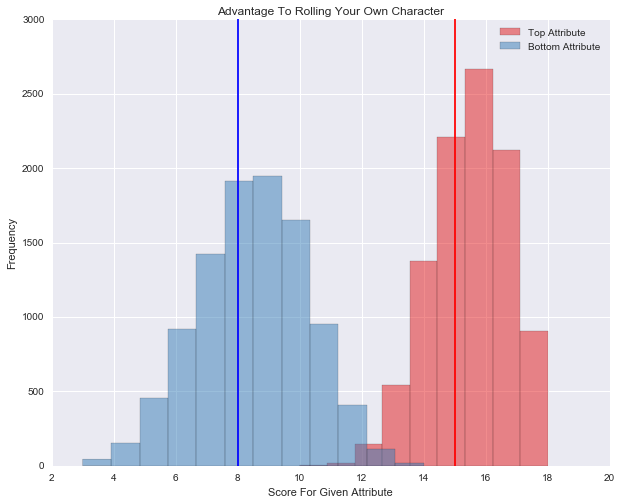

In [31]:
from matplotlib import pyplot

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

c1, c2, c3, c4, c5, c6 = sns.color_palette("Set1", 6)

pyplot.title('Advantage To Rolling Your Own Character')

pyplot.plot((15, 15), (0, 3000), 'k-', color='red')
pyplot.plot((8, 8), (0, 3000), 'k-', color='blue')

sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (10, 8)})

pyplot.hist(X.top, bins = 9, alpha=0.5, color = c1, label='Top Attribute')
pyplot.hist(X.bottom, bins = 12, alpha=0.5, color = c2, label='Bottom Attribute')
pyplot.ylabel("Frequency")
pyplot.xlabel("Score For Given Attribute")
pyplot.legend(loc='upper right')
pyplot.show()

Above the blue line indicates the lowest pre-generated score, 8, as projected over a histogram with the lowest attribute, which has a median score of 9. 

Similarly, the red line indicates the highest pre-generated score, 15, as projected over a histogram with the highes attribute, which has a median score of 16. 

However, this advantage is less pronounced in the 'middle' attributes

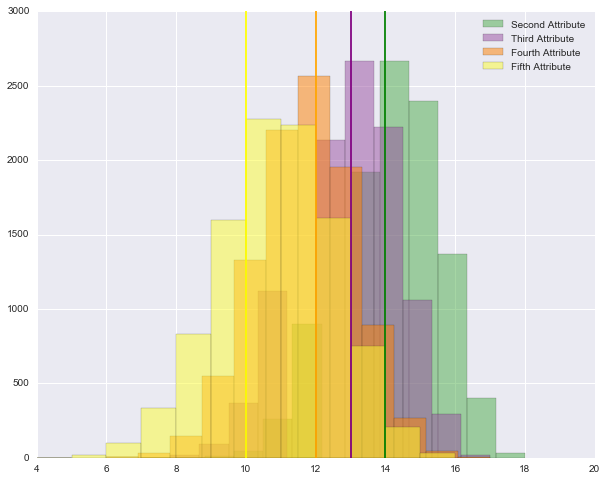

In [37]:
traits=[15,14,13,12,10,8]

pyplot.plot((14, 14), (0, 3000), 'k-', color='green')
pyplot.plot((13, 13), (0, 3000), 'k-', color='purple')
pyplot.plot((12, 12), (0, 3000), 'k-', color='orange')
pyplot.plot((10, 10), (0, 3000), 'k-', color='yellow')

pyplot.hist(X.second, bins = 12, alpha=0.5, color = c3, label='Second Attribute')
pyplot.hist(X.third, bins = 12, alpha=0.5, color = c4, label='Third Attribute')
pyplot.hist(X.fourth, bins = 12, alpha=0.5, color = c5, label='Fourth Attribute')
pyplot.hist(X.fifth, bins = 12, alpha=0.5, color = c6, label='Fifth Attribute')

pyplot.legend(loc='upper right')
pyplot.show()

In [8]:
import numpy as np

print np.median(X.top)

print np.median(X.second)

print np.median(X.third)

print np.median(X.fourth)

print np.median(X.fifth)

print np.median(X.bottom)

16.0
14.0
13.0
12.0
10.0
9.0


In [66]:


probs = np.unique(X.second, return_counts=True)[1]/float(len(X.second))

[float(i)*100 for i in probs]

[0.02,
 0.09,
 0.47000000000000003,
 2.58,
 9.02,
 19.18,
 26.650000000000002,
 23.97,
 13.700000000000001,
 3.9899999999999998,
 0.33]

In [107]:
import numpy
import pandas as pd



first = np.unique(X.top, return_counts=True)[1]
i1=np.unique(X.top, return_counts=True)[0]

second = np.unique(X.second, return_counts=True)[1]
i2=np.unique(X.second, return_counts=True)[0]

third = np.unique(X.third, return_counts=True)[1]
i3=np.unique(X.third, return_counts=True)[0]

fourth = np.unique(X.fourth, return_counts=True)[1]
i4=np.unique(X.fourth, return_counts=True)[0]

fifth = np.unique(X.fifth, return_counts=True)[1]
i5=np.unique(X.fifth, return_counts=True)[0]

sixth = np.unique(X.bottom, return_counts=True)[1]
i6=np.unique(X.bottom, return_counts=True)[0]

df = pd.DataFrame(index=range(3,21))

df = df.join(pd.DataFrame({'first':first}, index=i1))
df = df.join(pd.DataFrame({'second':second}, index=i2))
df = df.join(pd.DataFrame({'third':third}, index=i3))
df = df.join(pd.DataFrame({'fourth':fourth}, index=i4))
df = df.join(pd.DataFrame({'fifth':fifth}, index=i5))
df = df.join(pd.DataFrame({'sixth':sixth}, index=i6))

df = df.fillna(0)

df = df/10000

df['value'] = df.index.tolist()

df

,first,second,third,fourth,fifth,sixth,value
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0045,3
4,0.0000,0.0000,0.0000,0.0000,0.0002,0.0153,4
5,0.0000,0.0000,0.0000,0.0000,0.0019,0.0457,5
6,0.0000,0.0000,0.0000,0.0008,0.0097,0.0919,6
7,0.0000,0.0000,0.0001,0.0034,0.0338,0.1422,7
8,0.0000,0.0002,0.0019,0.0148,0.0831,0.1913,8
9,0.0000,0.0009,0.0091,0.0550,0.1595,0.1946,9
10,0.0005,0.0047,0.0366,0.1332,0.2279,0.1651,10
11,0.0022,0.0258,0.1120,0.2200,0.2238,0.0952,11
12,0.0149,0.0902,0.2136,0.2564,0.1610,0.0411,12


In [119]:
traits

[15, 14, 13, 12, 10, 8]

So what are the odds of rolling higher vs lower? 

In [122]:
print df.ix[16:]['first'].sum()/  df.ix[:14]['first'].sum()

print df.ix[15:]['second'].sum()/ df.ix[:13]['second'].sum()

print df.ix[14:]['third'].sum()/ df.ix[:12]['third'].sum()

print df.ix[13:]['fourth'].sum()/ df.ix[:11]['fourth'].sum()

print df.ix[11:]['fifth'].sum()/ df.ix[:9]['fifth'].sum()

print df.ix[9:]['sixth'].sum()/ df.ix[:7]['sixth'].sum()

2.71967526266
1.33896683673
0.963836056791
0.74063670412
1.67904233171
1.69926568758


In [124]:
print df.ix[15:]['first'].sum()/  df.ix[:14]['first'].sum()

print df.ix[14:]['second'].sum()/ df.ix[:13]['second'].sum()

print df.ix[13:]['third'].sum()/ df.ix[:12]['third'].sum()

print df.ix[12:]['fourth'].sum()/ df.ix[:11]['fourth'].sum()

print df.ix[10:]['fifth'].sum()/ df.ix[:9]['fifth'].sum()

print df.ix[8:]['sixth'].sum()/ df.ix[:7]['sixth'].sum()

3.77554918816
2.1887755102
1.67881060809
1.34082397004
2.46981263012
2.33778371162
